## **Proyecto 2** – Modelos de clasificación supervisada para evaluar la calidad del vino de Portugal 

**Integrates del equipo:**
 
Javier Callejas Cardozo
 
Oscar Ivan Echeverria Marrugo
 
Fabian Andrés Parrado Velásquez
 
Xiomara Grisales Henao

En la referencia anterior, se crearon dos conjuntos de datos, utilizando muestras de vino tinto y blanco.
Las entradas incluyen pruebas objetivas (por ejemplo, valores de pH) y la salida se basa en datos sensoriales
(mediana de al menos 3 evaluaciones realizadas por expertos en vinos). Cada experto calificó la calidad del vino
entre 0 (muy mala) y 10 (muy excelente). Se aplicaron varios métodos de minería de datos para modelar
estos conjuntos de datos bajo un enfoque de regresión. El modelo de máquina de vectores de soporte logró los
mejores resultados. Se calcularon varias métricas: MAD, matriz de confusión para una tolerancia de error fija (T),
etc. Además, graficamos las importancias relativas de las variables de entrada (medidas mediante un procedimiento de análisis de sensibilidad)

Los dos conjuntos de datos están relacionados con las variantes roja y blanca del vino portugués "Vinho Verde".
Para más detalles, consulte: http://www.vinhoverde.pt/en/ o la referencia [Cortez et al., 2009].
Debido a cuestiones de privacidad y logística, solo están disponibles las variables fisicoquímicas (entradas) y sensoriales (salida) (p. ej., no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.).

Estos conjuntos de datos pueden considerarse como tareas de clasificación o regresión.
Las clases están ordenadas y no equilibradas (p. ej., hay muchos más vinos normales que excelentes o malos). Se podrían utilizar algoritmos de detección de valores atípicos para detectar los pocos vinos excelentes o malos. Además, no estamos seguros de si todas las variables de entrada son relevantes. Por lo tanto,
podría ser interesante probar métodos de selección de características.

Variables de entrada (basadas en pruebas fisicoquímicas): 1 - acidez fija 2 - acidez volátil 3 - ácido cítrico 4 - azúcar residual 5 - cloruros 6 - dióxido de azufre libre 7 - dióxido de azufre total 8 - densidad 9 - pH 10 - sulfatos 11 - alcohol Variable de salida (basada en datos sensoriales): 12 - calidad (puntuación entre 0 y 10)

In [180]:
### Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt


In [181]:
#1 Carguemos los datos
df_red =pd.read_csv("../Datos/winequality-red.csv", sep = ';', encoding = 'latin-1')
df_white =pd.read_csv("../Datos/winequality-white.csv", sep = ';', encoding = 'latin-1')

## Vino Rojo

In [183]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [184]:
display("primeros 3 registros",df_red.head(3))
display("3 últimos registros",df_red.tail(3))
display("Columnas:",df_red.columns)
display("Índices:",df_red.index)
display("Tipos de registros en el DataFrame",df_red.dtypes)
display("Muestra aleatoria de 3 registros",df_red.sample(3))

'primeros 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


'3 últimos registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


'Columnas:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=1599, step=1)

'Tipos de registros en el DataFrame'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

'Muestra aleatoria de 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1514,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6
642,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.400000,5
654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.500000,5


In [185]:
df_red.shape
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [186]:
#Análisis de filas duplicadas en la DB, calculamos las filas antes de eliminar las repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_red.shape}')
 
#Eliminamos filas duplicadas de la DB
df = df_red.drop_duplicates()
#Impresión del tamaño del set luego de eliminar las duplicadas
 
print(f'Tamaño del set después de eliminar las filas repetidas: {df_red.shape}')
#Se evidencia que no se encuentran valores duplicados
df_red

Tamaño del set antes de eliminar las filas repetidas: (1599, 12)
Tamaño del set después de eliminar las filas repetidas: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [187]:
# Identificar valores nulos
display(df_red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [188]:
df_red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Vino Blanco

In [190]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [191]:
display("primeros 3 registros",df_white.head(3))
display("3 últimos registros",df_white.tail(3))
display("Columnas:",df_white.columns)
display("Índices:",df_white.index)
display("Tipos de registros en el DataFrame",df_white.dtypes)
display("Muestra aleatoria de 3 registros",df_white.sample(3))

'primeros 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


'3 últimos registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


'Columnas:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=4898, step=1)

'Tipos de registros en el DataFrame'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

'Muestra aleatoria de 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1494,7.7,0.35,0.49,8.65,0.033,42.0,186.0,0.9931,3.14,0.38,12.4,8
1730,9.2,0.23,0.30,1.10,0.031,40.0,99.0,0.9929,2.94,0.30,10.4,6
1493,8.0,0.34,0.49,9.00,0.033,39.0,180.0,0.9936,3.13,0.38,12.3,8


In [192]:
df_white.shape
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [193]:
#Análisis de filas duplicadas en la DB, calculamos las filas antes de eliminar las repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_white.shape}')
 
#Eliminamos filas duplicadas de la DB
df = df_white.drop_duplicates()
#Impresión del tamaño del set luego de eliminar las duplicadas
 
print(f'Tamaño del set después de eliminar las filas repetidas: {df_white.shape}')
#Se evidencia que no se encuentran valores duplicados
df_white

Tamaño del set antes de eliminar las filas repetidas: (4898, 12)
Tamaño del set después de eliminar las filas repetidas: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [194]:
# Identificar valores nulos
display(df_white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [195]:
df_white.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [196]:
df_red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Se identifica que las dos bases tienen las mismas cantidad columnas no tienen nulos ni valores repetidos, por lo caul se agrega una nueva columna que identifique si el tipo de vino es blanco o rojo, se hace de la siguinte manera. Blanco=1  Rojo=2

In [198]:
# Agregar una columna para identificar el tipo de vino
#df_red['type_wine'] = '2'
#df_white['type_wine'] = '1'
df_red.insert(0, "type_wine", 2)
df_white.insert(0, "type_wine", 1)

In [199]:
#verificacion de la nueva columna en df_red
df_red.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [200]:
#verificacion de la nueva columna en df_white
df_white.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [201]:
# se consulta la cantidad de filas de los dos data set pra verrifcarlo despuesd e la concatenacion
display(df_red.shape)
display(df_white.shape)

(1599, 13)

(4898, 13)

In [202]:
# se procede a concatenar los dos data set df_red y df_white
df_wine_total = pd.concat([df_red, df_white])

In [203]:
# Verificacion de columnas en el nuevo data_set df_wine_total
df_wine_total.shape

(6497, 13)

In [204]:
# Se visualizan las primeras filas del nuevo data set
df_wine_total.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


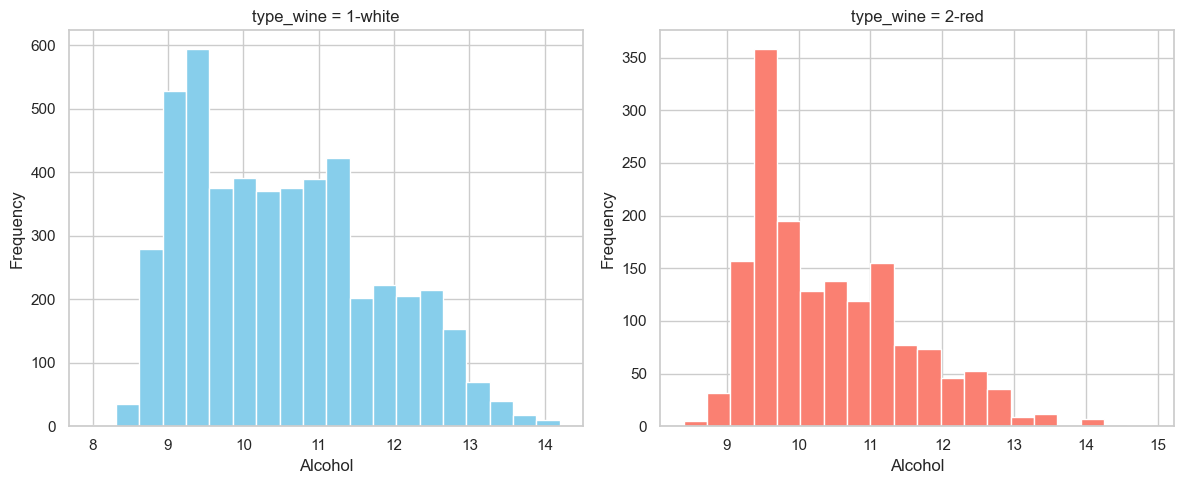

In [205]:
#df_wine_total[df_wine_total['type_wine'] == 2]['alcohol'].hist(bins=20)
#df_wine_total[df_wine_total['type_wine'] == 1]['alcohol'].hist(bins=20)
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para type_wine = 1
df_wine_total[df_wine_total['type_wine'] == 1]['alcohol'].hist(bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('type_wine = 1-white')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Frequency')

# Histograma para type_wine = 2
df_wine_total[df_wine_total['type_wine'] == 2]['alcohol'].hist(bins=20, ax=axes[1], color='salmon')
axes[1].set_title('type_wine = 2-red')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Frequency')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

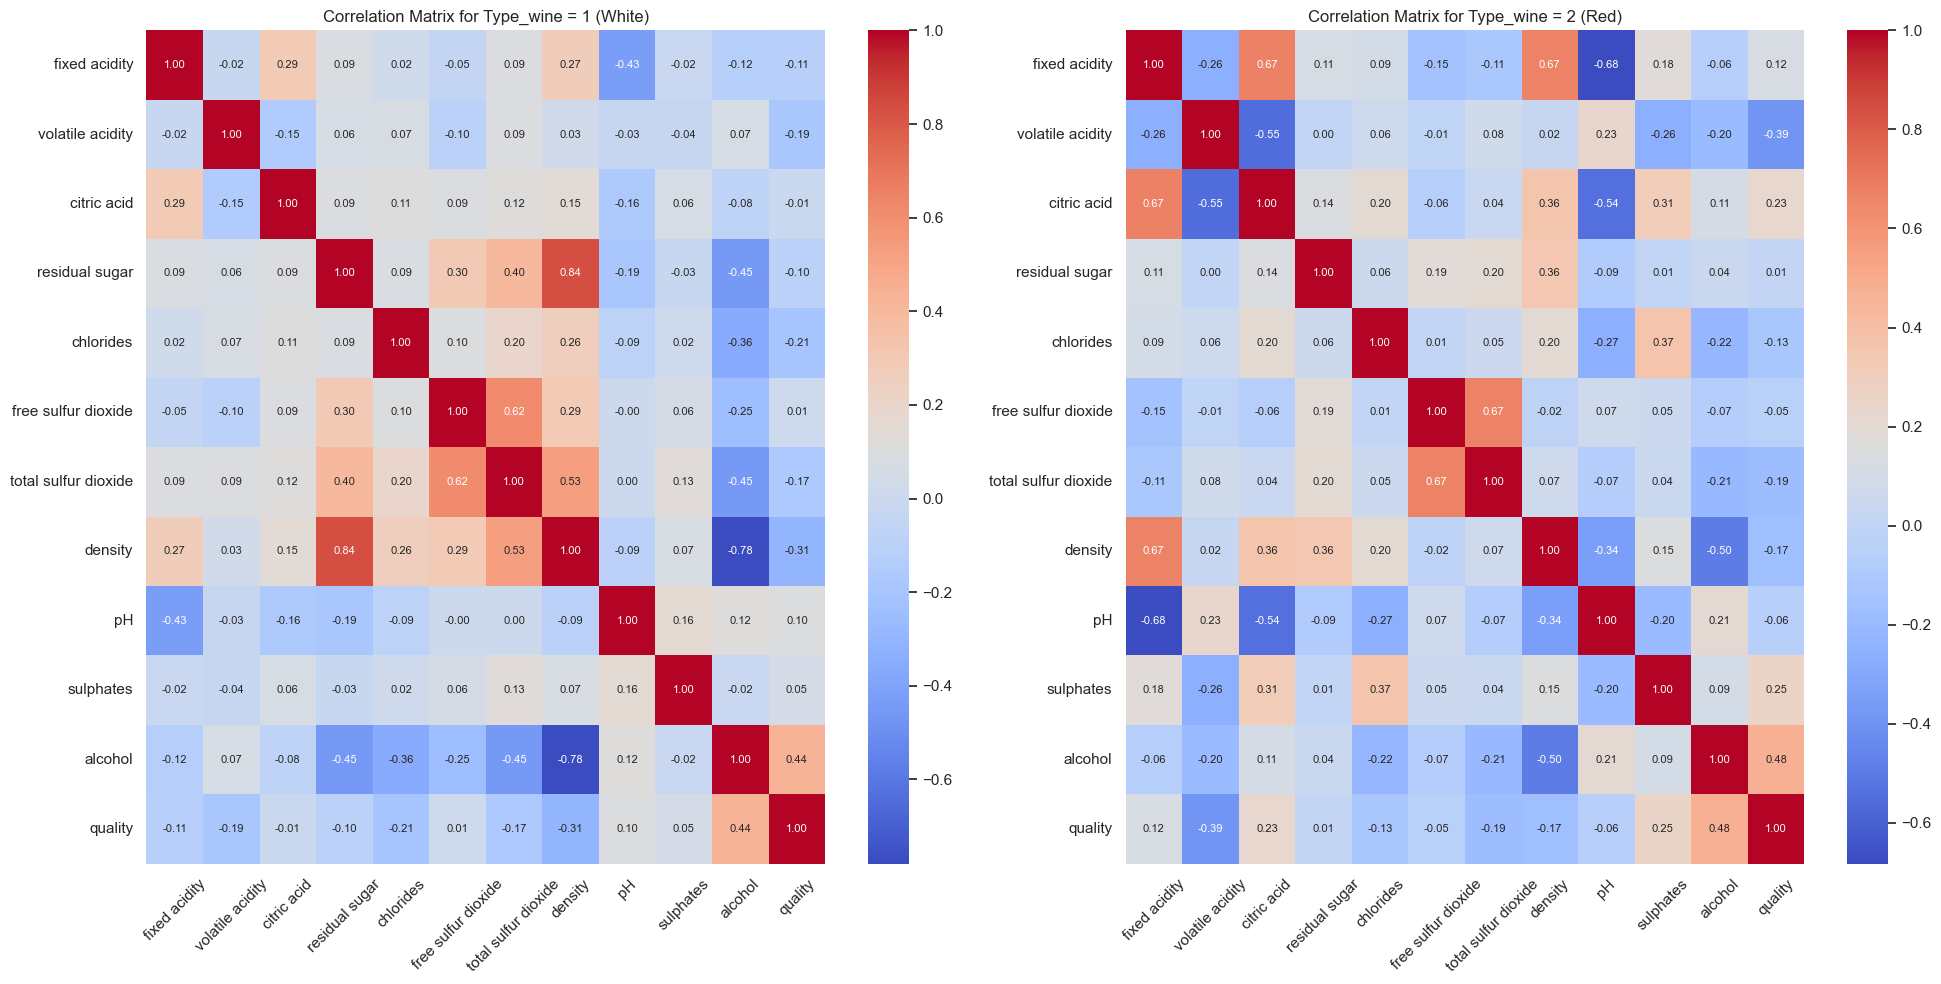

<Axes: >

In [206]:
#Mapa de calor
# Eliminar la columna 'type_wine' antes de calcular la correlación
corr_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine']).corr()
corr_type2 = df_wine_total[df_wine_total['type_wine'] == 2].drop(columns=['type_wine']).corr()

# Crear la figura y los subplots con un tamaño mayor
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Mapa de calor para type_wine = 1 con rotación en las etiquetas
sns.heatmap(corr_type1, annot=True, cmap='coolwarm', ax=axes[0], fmt=".2f", annot_kws={"size": 8})
axes[0].set_title('Correlation Matrix for Type_wine = 1 (White)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Mapa de calor para type_wine = 2 con rotación en las etiquetas
sns.heatmap(corr_type2, annot=True, cmap='coolwarm', ax=axes[1], fmt=".2f", annot_kws={"size": 8})
axes[1].set_title('Correlation Matrix for Type_wine = 2 (Red)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

corr_red = df_red.corr()
sns.heatmap(corr_red, annot=True, cmap='coolwarm')

In [207]:
# Calcular la matriz de correlación para cada tipo de vino
corr_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine']).corr()
corr_type2 = df_wine_total[df_wine_total['type_wine'] == 2].drop(columns=['type_wine']).corr()

# Mostrar la matriz de correlación para type_wine = 1
print("Matriz de correlación para type_wine = 1 (White):")
print(corr_type1)
print("\n" + "="*50 + "\n")

# Mostrar la matriz de correlación para type_wine = 2
print("Matriz de correlación para type_wine = 2 (Red):")
print(corr_type2)

Matriz de correlación para type_wine = 1 (White):
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  c

In [208]:
# Calcular la matriz de correlación para cada tipo de vino
corr_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine']).corr()
corr_type2 = df_wine_total[df_wine_total['type_wine'] == 2].drop(columns=['type_wine']).corr()

# Variables mejor relacionadas con 'quality' para type_wine = 1
correlaciones_type1 = corr_type1['quality'].sort_values(ascending=False)
print("\nCorrelaciones con respecto a 'quality' para type_wine = 1 (White):")
print(correlaciones_type1)

# Variables mejor relacionadas con 'quality' para type_wine = 2
correlaciones_type2 = corr_type2['quality'].sort_values(ascending=False)
print("\nCorrelaciones con respecto a 'quality' para type_wine = 2 (Red):")
print(correlaciones_type2)


Correlaciones con respecto a 'quality' para type_wine = 1 (White):
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Correlaciones con respecto a 'quality' para type_wine = 2 (Red):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


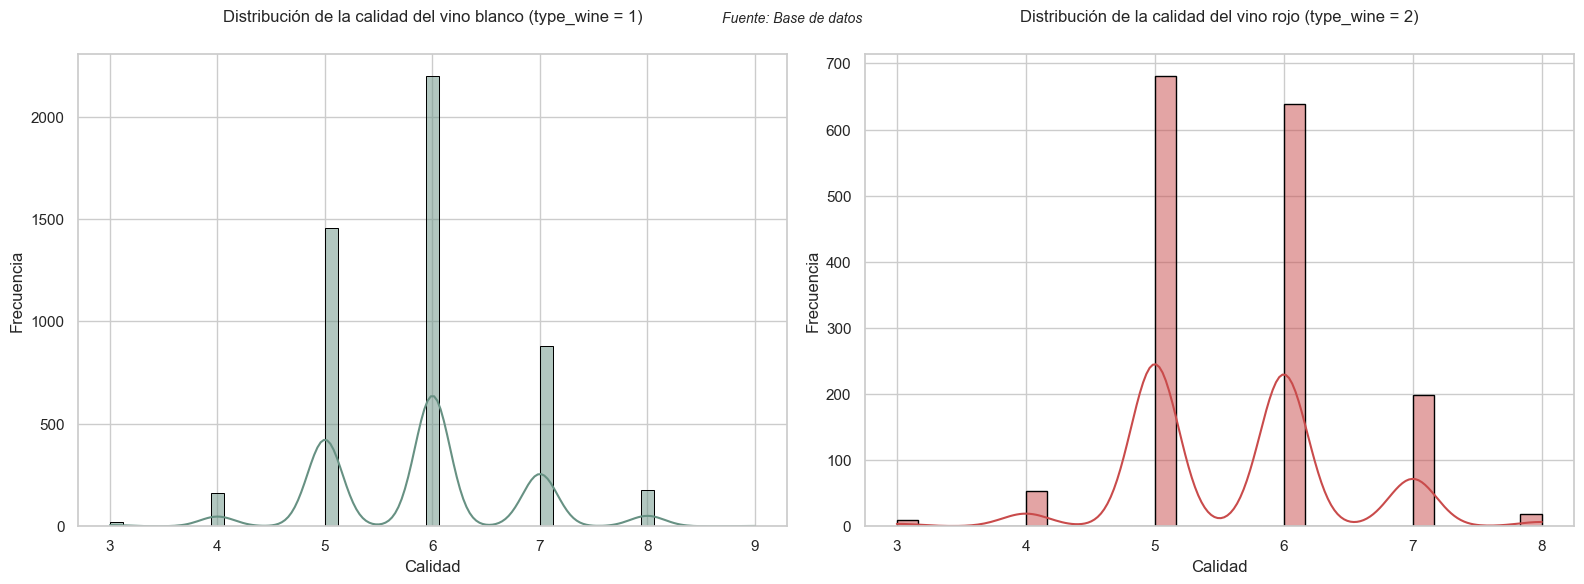

In [210]:
# Configuración de estilo
sns.set(style='whitegrid')

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para type_wine = 1
sns.histplot(df_wine_total[df_wine_total['type_wine'] == 1]['quality'], kde=True, color='#679183', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribución de la calidad del vino blanco (type_wine = 1)', y=1.05)
axes[0].set_xlabel('Calidad')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Histograma para type_wine = 2
sns.histplot(df_wine_total[df_wine_total['type_wine'] == 2]['quality'], kde=True, color='#c94b4b', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribución de la calidad del vino rojo (type_wine = 2)', y=1.05)
axes[1].set_xlabel('Calidad')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True)

# Agregar la fuente de datos en la figura principal
plt.figtext(0.5, 0.95, 'Fuente: Base de datos', ha='center', fontsize=10, style='italic')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

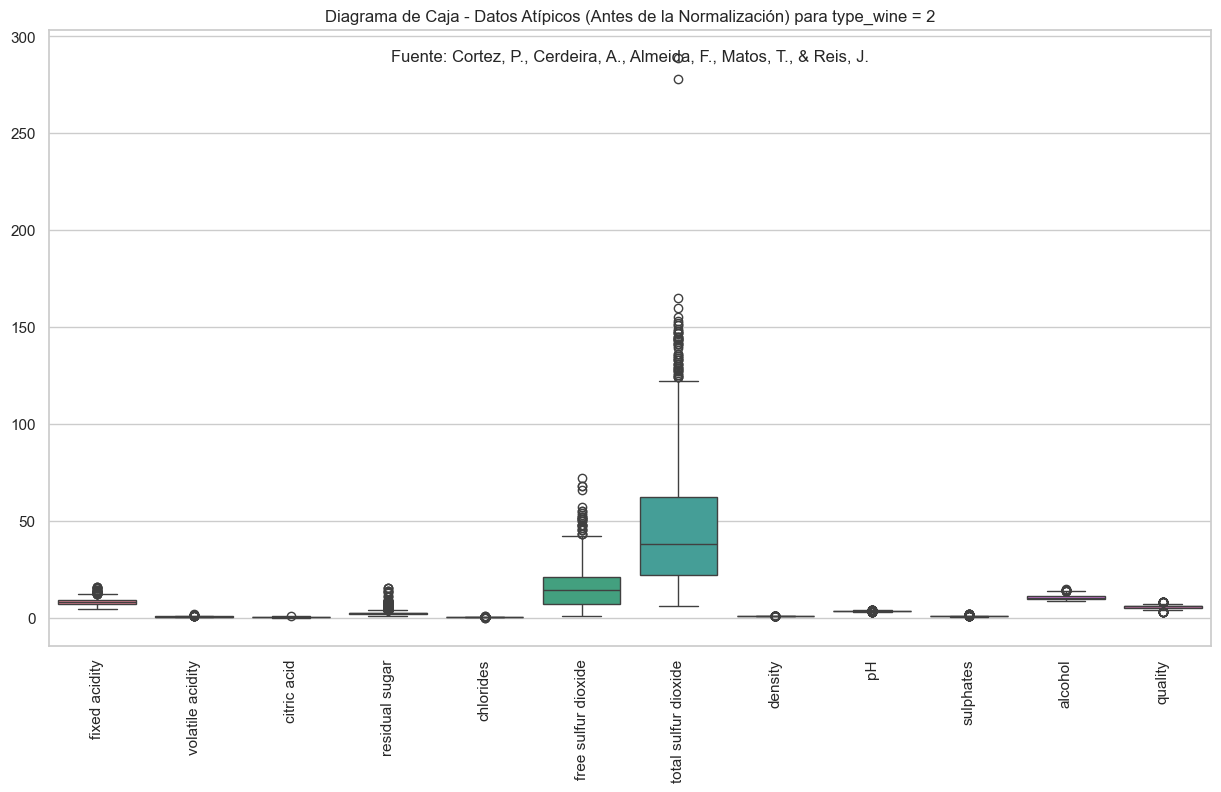

In [211]:
# Ignorar advertencias de futuros cambios
warnings.filterwarnings('ignore', category=FutureWarning)

# Filtrar el DataFrame para obtener solo los datos con type_wine = 2
df_type2 = df_wine_total[df_wine_total['type_wine'] == 2]

# Seleccionar automáticamente todas las columnas numéricas del DataFrame filtrado
df_num_type2 = df_type2.select_dtypes(include=['number']).drop(columns=['type_wine'])

# Crear un diagrama de caja para las columnas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_num_type2)
plt.title('Diagrama de Caja - Datos Atípicos (Antes de la Normalización) para type_wine = 2')
plt.text(x=0.5, y=0.95, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

In [212]:
scaler = MinMaxScaler()
# ajustar y transformar el data frame del vino rojo = 2
scaled_data = scaler.fit_transform(df_num_type2)
# convertir los datos escalados a data frame y mantener los nombres de las columnas
df_scaled = pd.DataFrame(scaled_data, columns=df_num_type2.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


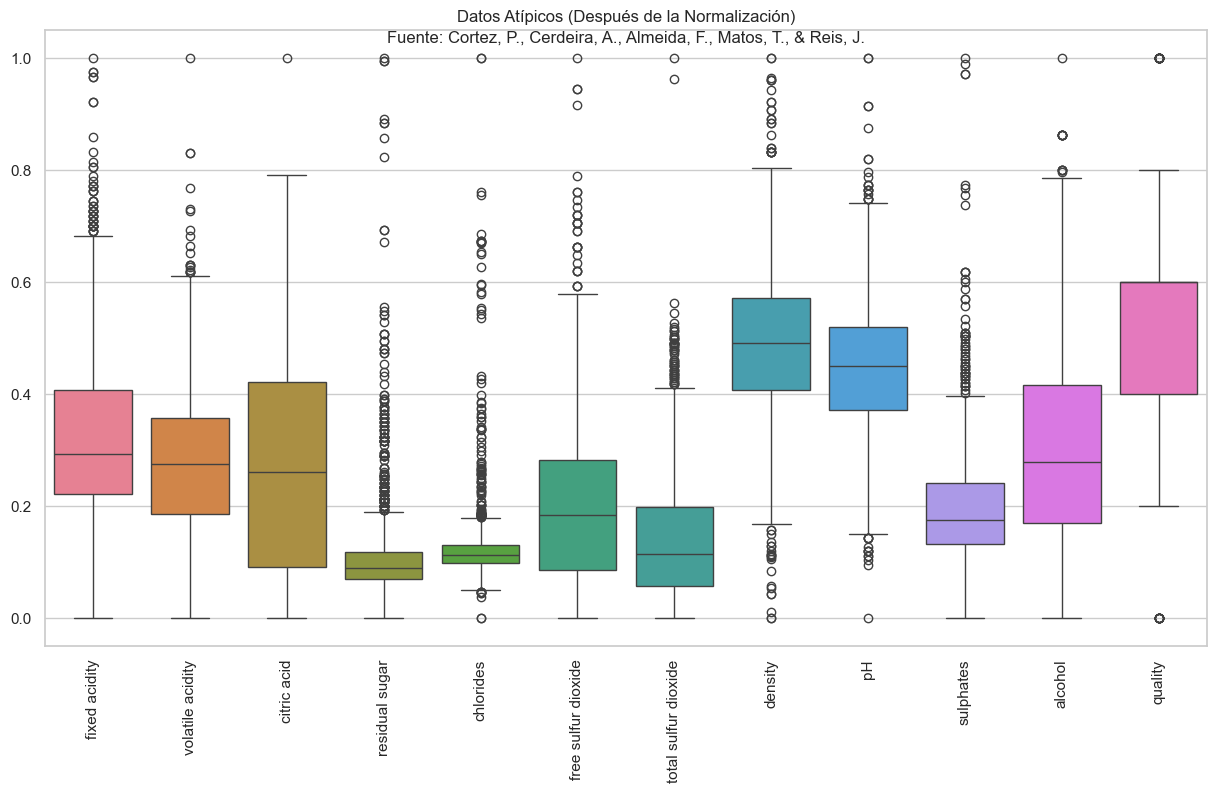

In [213]:
# Diagrama de caja para los datos escalados pra vino rojo
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled)
plt.title('Datos Atípicos (Después de la Normalización)')
plt.text(x=0.5, y=0.98, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

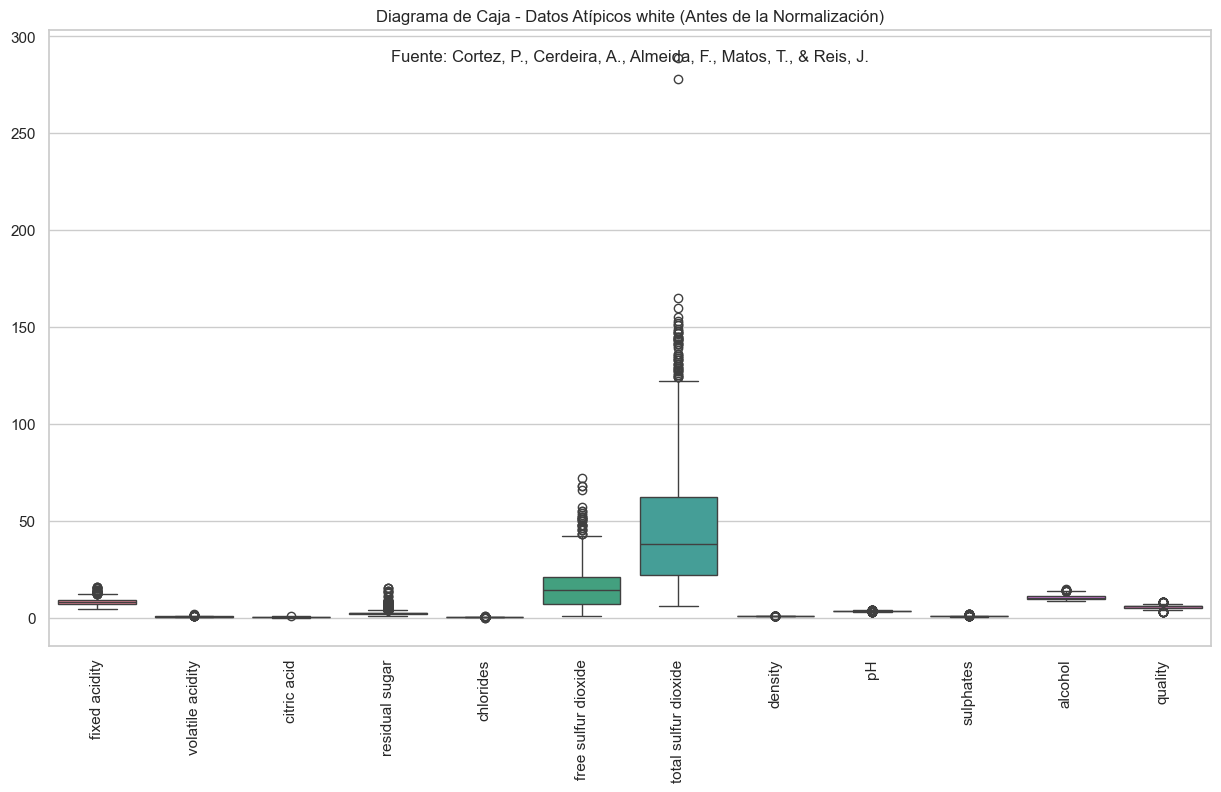

In [214]:
# Ignorar advertencias de futuros cambios
warnings.filterwarnings('ignore', category=FutureWarning)

# Filtrar el DataFrame para obtener solo los datos con type_wine = 1
df_type1 = df_wine_total[df_wine_total['type_wine'] == 1]

# Seleccionar automáticamente todas las columnas numéricas del DataFrame filtrado
df_num_type1 = df_type1.select_dtypes(include=['number']).drop(columns=['type_wine'])

# Crear un diagrama de caja para las columnas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_num_type2)
plt.title('Diagrama de Caja - Datos Atípicos white (Antes de la Normalización)')
plt.text(x=0.5, y=0.95, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

In [215]:
scaler = MinMaxScaler()
# ajustar y transformar el data frame pra vino blanco
scaled_dataw = scaler.fit_transform(df_num_type1)
# convertir los datos escalados a data frame y mantener los nombres de las columnas
df_scaledw = pd.DataFrame(scaled_dataw, columns=df_num_type1.columns)
df_scaledw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


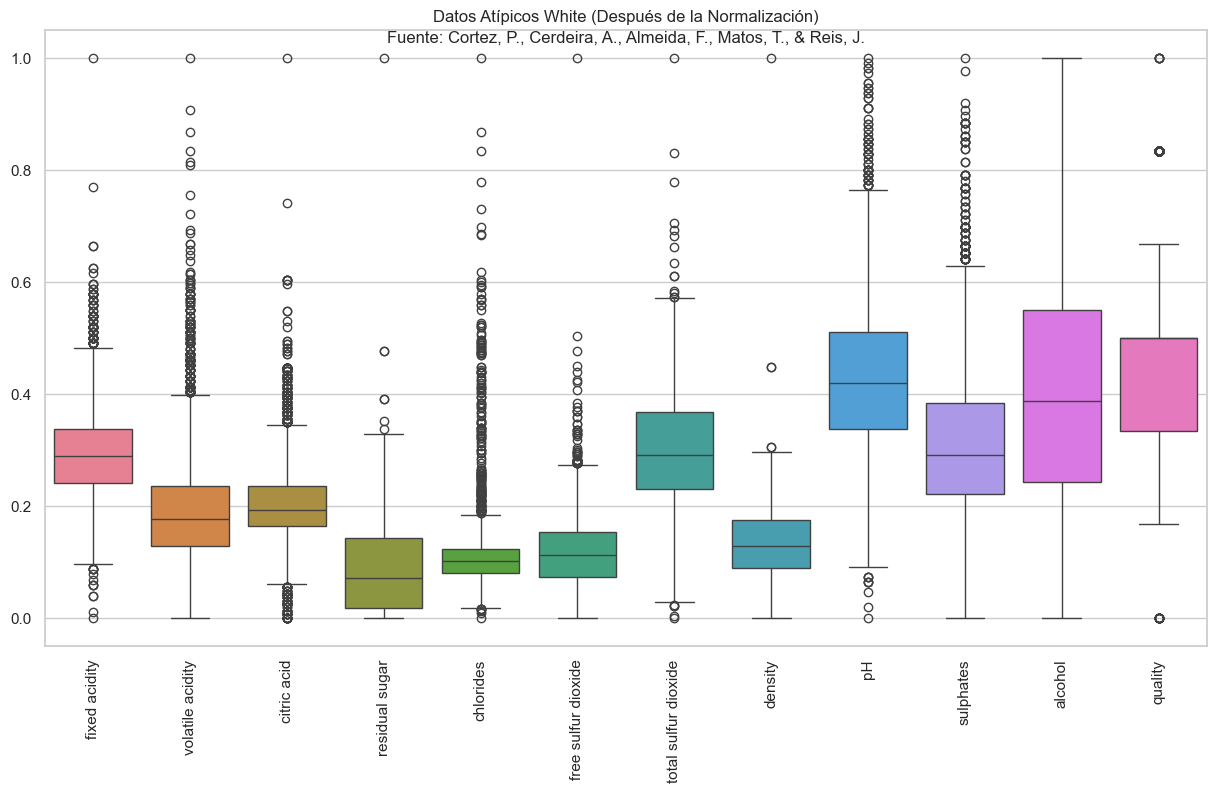

In [216]:
# Diagrama de caja para los datos escalados
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaledw)
plt.title('Datos Atípicos White (Después de la Normalización)')
plt.text(x=0.5, y=0.98, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

In [217]:
# Creación de la columna en el Data Frame #1 'type' definiendo como '1' el vino rojo
#df_red["type"] = "1"


In [218]:
# Creación de la columna en el Data Frame #2 'type' definiendo como '0' el vino blanco
#df_white["type"] = "0"

In [219]:
# Filtrar los datos para obtener solo los registros donde type_wine es igual a 1 vino blanco
df_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine'])
# Dividir en características (X) y variable objetivo (y)
X = df_type1.drop("quality", axis=1)
y = df_type1['quality']

In [233]:
df_type1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [245]:
df_type1['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [220]:

# Definimos las variables categóricas y numéricas
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns # VINO BLANCO
 
# Creamos pipelines de preprocesamiento VINO BLANCO
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Usamos ColumnTransformer para combinar ambas transformaciones VINO BLANCO
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

In [221]:
# Definimos el pipeline completo Vino blanco
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [222]:
model_pipeline.fit_transform(X) # Vino blanco

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [223]:
# Vino blanco
model_pipeline.fit_transform(X).shape

(4898, 11)

In [224]:
# Vino Blanco modelo RandomForest
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [258]:
## Ahora clasificación con SVM

from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

## Predicción

y_pred = clf.predict(X_test)

## Evaluación

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.55      0.53      0.54       291
           6       0.49      0.79      0.60       432
           7       0.00      0.00      0.00       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.17      0.22      0.19       980
weighted avg       0.38      0.51      0.43       980



In [259]:
clf.predict_proba(X_test)[:,1]

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
## Gráfico de PR
 
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
 
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
 
plt.plot(recall, precision)


In [ ]:
# Curva Precision-Recall y el Área Bajo la Curva (PR-AUC) VINO BLANCO modelo RandomForest
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba[:,1])

import matplotlib.pyplot as plt

probabilidades = np.linspace(0.01, max(y_test_pred_proba[:,1]) - 0.04, 99)

precisiones = []
recalls = []

for prob in probabilidades:
    y_test_pred = y_test_pred_proba[:,1] > prob
    precisiones.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))

plt.plot(probabilidades, precisiones, label='Precision')
plt.plot(probabilidades, recalls, label='Recall')
plt.xlabel('Probabilidad')
plt.ylabel('Score')
plt.legend()
plt.show()


Regresion logitica

In [253]:
# Vino Blanco 
## Regresón Logistica

from sklearn.linear_model import LogisticRegression

# Escalar los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Crear y entrenar el modelo con un número mayor de iteraciones
clf = LogisticRegression(random_state=42, max_iter=500)  # Aumenta max_iter a 500
clf.fit(X_train_l, y_train_l)

# Predicción
y_pred_l = clf.predict(X_test_l)

# Evaluación
print(classification_report(y_test_l, y_pred_l, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.04      0.07        25
           5       0.58      0.52      0.55       291
           6       0.51      0.75      0.61       432
           7       0.55      0.24      0.33       192
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         0

    accuracy                           0.53       980
   macro avg       0.31      0.22      0.22       980
weighted avg       0.52      0.53      0.50       980

